# MIS710 Machine Learning in Business - Assignment 1

**Student Name:** Pradipta Dutta

**Student ID:** s222006828

<a id = "cell_executivesummary"></a>
## 1. Business understandings, problem, solution and recommendations

#### NOTE: all the instructions and hints given in this template should be removed from your final submission. (Including this line)

**Aim:** To understand the factors that lead to Blackspots and create a Machine Learning Model to predict the risks of Blackspots.

_Use this section to briefly include the business understandings and the business problem to address, the aim of this project and recommendations for VicCrashAnalytics.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a id = "cell_exploration"></a>
## 2. Data understanding, preparation, explorations and visualisation

#### NOTE: You can create multiple Markdown and Code cells to present your work.

**Aim:** To demonstrate your understanding of data and report any insights emerging from data analysis

This section can be used for:
* Preparing (cleansing) for further processing.
* Finding meaningful patterns in the data set as relevant to the case study and the problem.
* Visualising variables related to the problem.

This section may include:
* Selection of relevant data features.
* Selection of an attribute as label.
* Approach to handling missing values (if any).
* Transformations on the dataset (can be any necessary modifications to the data - string value or categorial variables to numerical, any numeric normalizations, or any type conversions such as nominal to numeric and the similar).
* Univariate/Bivariate/Multivariate analyses (e.g., using visualizations etc.).

Make sure your visualizations are accompanied by relevant discussions of the insights the analyses and visualizations will/should lead to.

## **Import Libraries**

In [3]:
import pandas as pd #for data manipulation and analysis
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for model evaluation
from sklearn.metrics import precision_recall_curve, precision_recall_curve, classification_report
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, ConfusionMatrixDisplay

## **Load Data**

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML Business files/Blackspot.csv")

In [5]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5326 entries, 0 to 5325
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               5326 non-null   int64  
 1   EZI_ROAD_NAME                    5326 non-null   object 
 2   ROAD_NAME                        5326 non-null   object 
 3   ROAD_TYPE                        5326 non-null   object 
 4   AGE_LESS_THAN_15YRS_PCNT         5326 non-null   float64
 5   AGE_15_24YRS_PCNT                5326 non-null   float64
 6   AGE_25_44YRS_PCNT                5326 non-null   float64
 7   AGE_45_64YRS_PCNT                5326 non-null   float64
 8   AGE_18YRS_OVER_PCNT              5326 non-null   float64
 9   AGE_65YRS_OVER_PCNT              5317 non-null   float64
 10  SEO_PERSONS_PCNT                 5326 non-null   float64
 11  FC_COUPLE_NO_CHILDREN_PCNT       5326 non-null   float64
 12  FC_COUPLE_WITH_CHILD

(5326, 36)

In [6]:
data_types =['object', 'float', 'int']
df.describe(include=data_types)

,ID,EZI_ROAD_NAME,ROAD_NAME,ROAD_TYPE,AGE_LESS_THAN_15YRS_PCNT,AGE_15_24YRS_PCNT,AGE_25_44YRS_PCNT,AGE_45_64YRS_PCNT,AGE_18YRS_OVER_PCNT,AGE_65YRS_OVER_PCNT,...,Parkland%,Primary_Production%,Lq_Licenses,Intersection,Supermarket,primary_school,secondary_school,km_post,traffic_signal,Blackspot
count,5326.000000,5326,5326,5326,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5317.000000,...,5326.000000,5326.000000,5320.000000,5326,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326
unique,NaN,2185,2020,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,2
top,NaN,BASS HIGHWAY,PRINCES,ROAD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,non-Intersection,NaN,NaN,NaN,NaN,NaN,non-Blackspot
freq,NaN,52,75,3400,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4659,NaN,NaN,NaN,NaN,NaN,4759
mean,4996.381149,NaN,NaN,NaN,0.175456,0.099507,0.202988,0.306965,0.774056,0.202530,...,0.137413,0.375253,0.378008,NaN,0.012580,0.025535,0.004506,0.127488,0.022343,NaN
std,2885.736141,NaN,NaN,NaN,0.050574,0.030945,0.054621,0.067690,0.102008,0.105217,...,0.277777,0.431760,1.550966,NaN,0.111462,0.157758,0.066983,0.333550,0.147811,NaN
min,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2477.000000,NaN,NaN,NaN,0.144847,0.079897,0.172337,0.274064,0.751515,0.149367,...,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,5020.500000,NaN,NaN,NaN,0.177419,0.102041,0.197248,0.317073,0.778723,0.181102,...,0.000000,0.081297,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,7478.750000,NaN,NaN,NaN,0.205817,0.123007,0.234266,0.348189,0.816156,0.237288,...,0.114782,0.962690,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


**Removing unnecessary features**

In [7]:
df = df.drop(["ID","EZI_ROAD_NAME","ROAD_NAME","SEO_PERSONS_PCNT"], axis=1)

## **Inspect missing data**

In [8]:
for i in df.iloc[:,0:]:
  if (df[i].isnull().sum() != 0):
    miss=df[i].isna().sum()
    print(i,'missing: ', miss)

AGE_65YRS_OVER_PCNT missing:  9
Lq_Licenses missing:  6


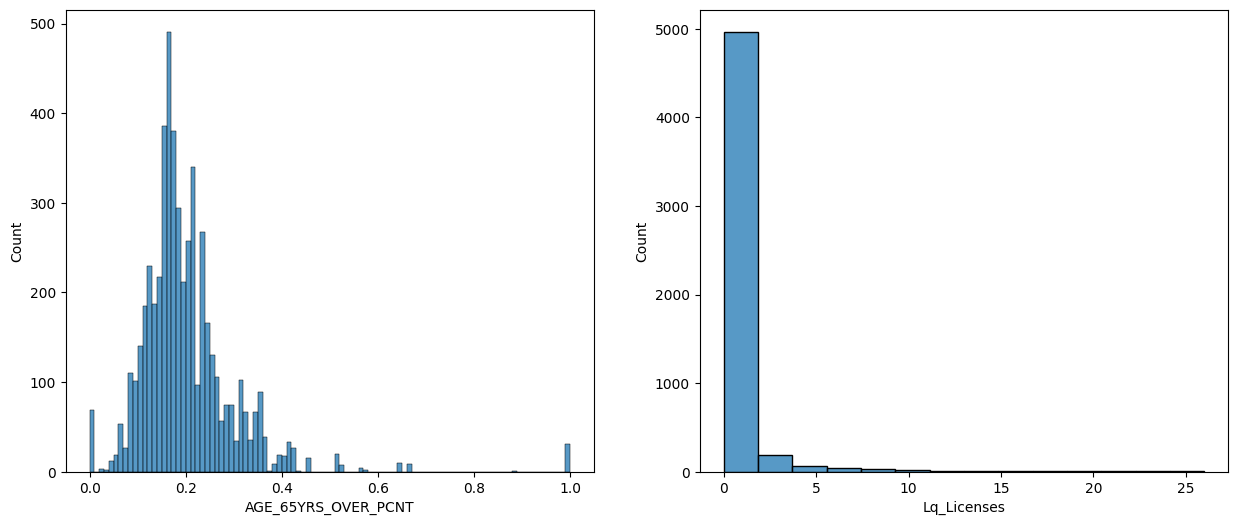

In [9]:
list_missing = ["AGE_65YRS_OVER_PCNT","Lq_Licenses"]
fig,ax = plt.subplots(nrows=1,ncols=2, figsize=(15,6))
axes = ax.flatten()
for i in range(len(list_missing)):
  sns.histplot(data=df, x=df[list_missing[i]], ax = axes[i])

In [10]:
df.replace("", pd.NA, inplace=True)
df['AGE_65YRS_OVER_PCNT'].fillna(df['AGE_65YRS_OVER_PCNT'].median(), inplace=True)    #since the distribution is skewed, fill with median
df['Lq_Licenses'].fillna(df['Lq_Licenses'].mode()[0], inplace=True)                      #since the distribution is exponential, fill with mode

## **Encoding the data**

### **Intersection Column**

In [11]:
def Intersection(x):
  if x=="Intersection":return 1
  if x=="non-Intersection":return 0
df['Intersection_N']= df['Intersection'].apply(Intersection)

### **Road Type Column**

In [12]:
df['ROAD_TYPE'].unique()

array(['ROAD', 'STREET', 'HIGHWAY', 'DRIVE', 'WAY', 'FREEWAY'],
      dtype=object)

In [13]:
def road_type(x):
  if x=="ROAD":return 1
  if x=="STREET":return 2
  if x=="HIGHWAY":return 3
  if x=="DRIVE":return 4
  if x=="WAY":return 5
  if x=="FREEWAY":return 6

df['ROAD_TYPE_N']= df['ROAD_TYPE'].apply(road_type)

### **Blackspot Column**

In [14]:
def Blackspot(x):
  if x=="Blackspot":return 1
  if x=="non-Blackspot":return 0
df['Blackspot_N']=df['Blackspot'].apply(Blackspot)

## **Scaling the data**

In [15]:
mms = MinMaxScaler()

df.iloc[:,1:7] = mms.fit_transform(df.iloc[:,1:7])
df.iloc[:,7:10] = mms.fit_transform(df.iloc[:,7:10])
df.iloc[:,13:16] = mms.fit_transform(df.iloc[:,13:16])
df.iloc[:,19:24] = mms.fit_transform(df.iloc[:,19:24])

## **Exploratory Data Analysis and Visualization**

### **Univariate Analysis**

**Examine the distribution of the target**

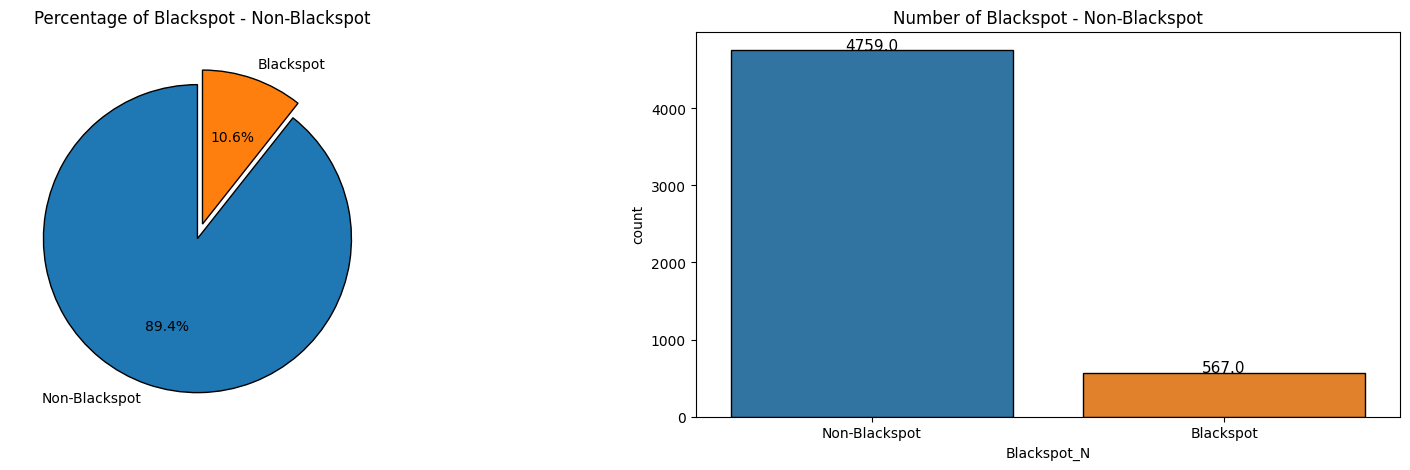

In [16]:
l = list(df['Blackspot_N'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['Non-Blackspot','Blackspot'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Percentage of Blackspot - Non-Blackspot');

plt.subplot(1,2,2)
ax = sns.countplot(x='Blackspot_N',data = df,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Non-Blackspot','Blackspot'])

plt.title('Number of Blackspot - Non-Blackspot');
plt.show()

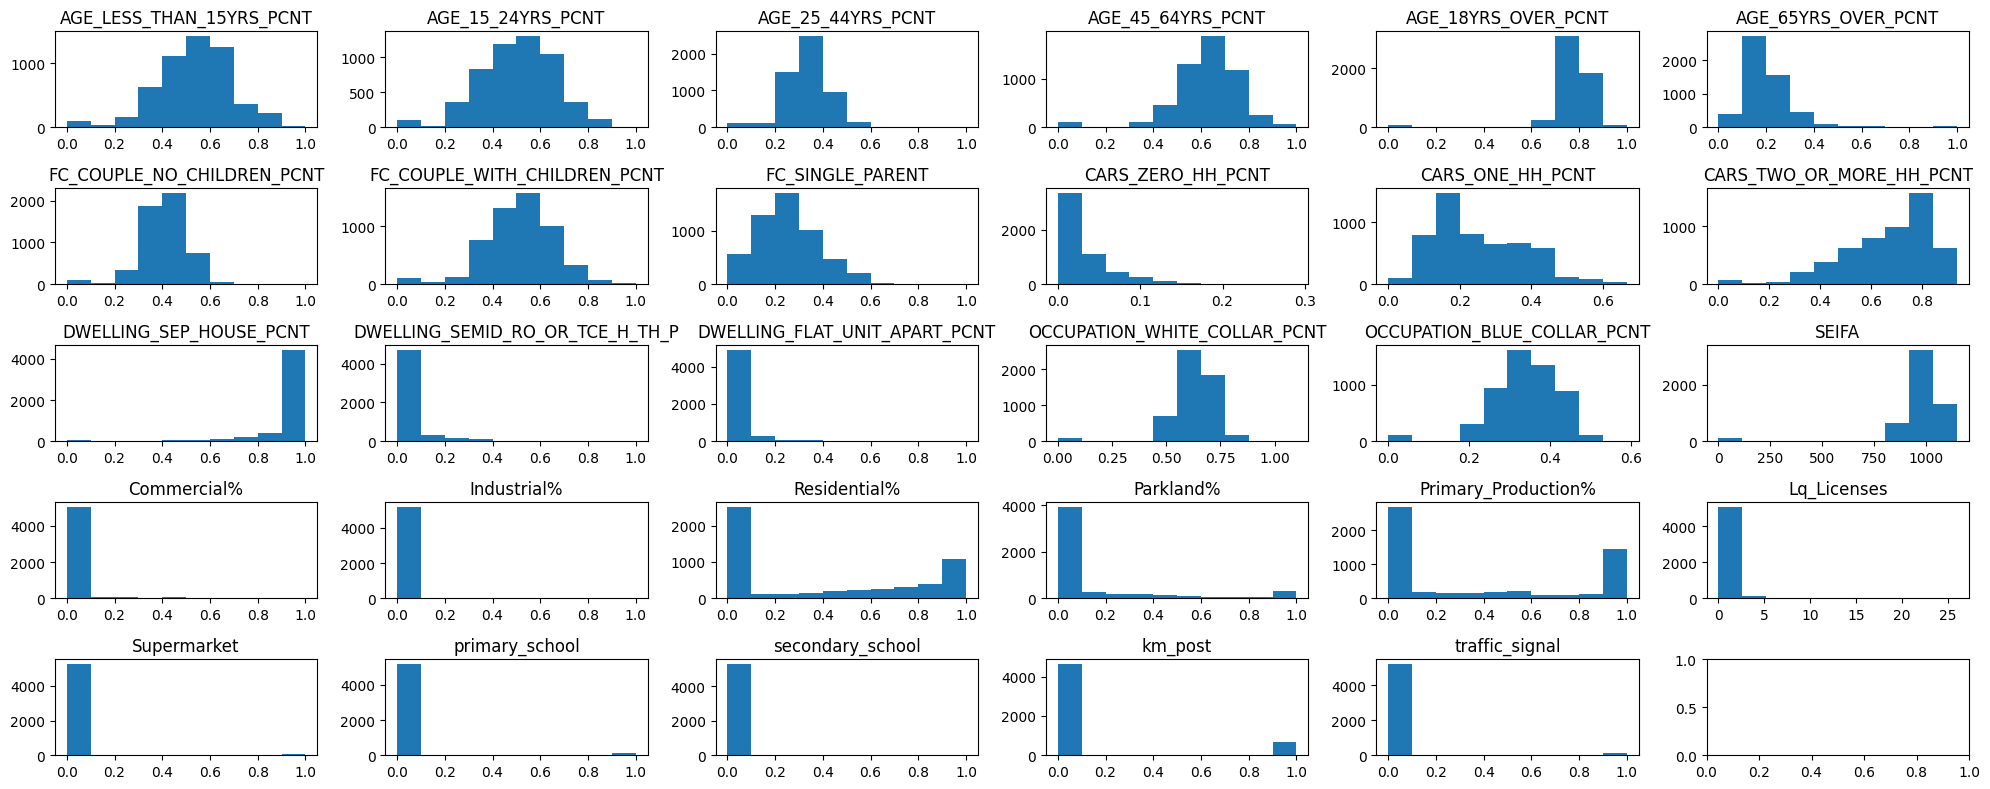

In [17]:
numerical_values = df.select_dtypes(include=["int64","float64"]).columns.tolist()
del numerical_values[-3:]
fig,ax = plt.subplots(nrows=5,ncols=6,figsize=(20,8))      #Checking the distribution of the numeric variables
ax = ax.flatten()
for i in range(len(numerical_values)):
  ax[i].hist(x = df[numerical_values[i]])
  ax[i].set_title(f"{numerical_values[i]}")

plt.tight_layout()
plt.show()

### **Bivariate Analysis**

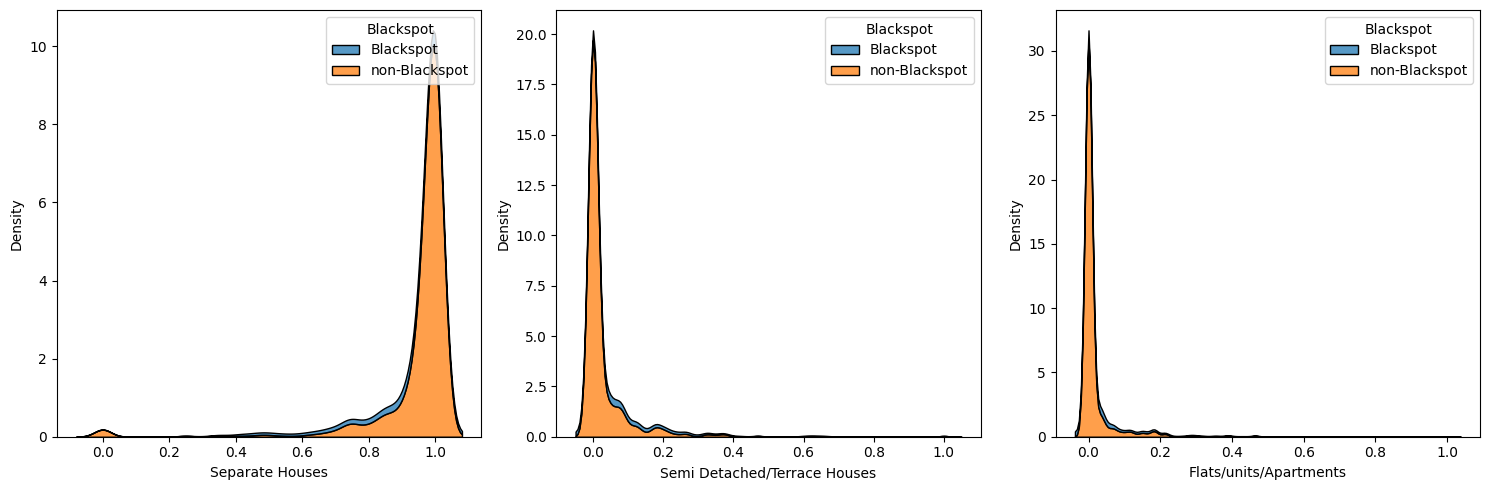

In [18]:
#Dwellings Vs Blackspot

list_dwelling = ["DWELLING_SEP_HOUSE_PCNT","DWELLING_SEMID_RO_OR_TCE_H_TH_P","DWELLING_FLAT_UNIT_APART_PCNT"]
title = ["Separate Houses","Semi Detached/Terrace Houses","Flats/units/Apartments"]

fig,ax = plt.subplots(nrows=1,ncols=3, figsize=(15,5))
axes = ax.flatten()
for i in range(len(list_dwelling)):
  sns.kdeplot(data=df, x=df[list_dwelling[i]], hue="Blackspot", multiple="stack", ax = axes[i])
  axes[i].set_xlabel(title[i])

plt.tight_layout()
plt.show()

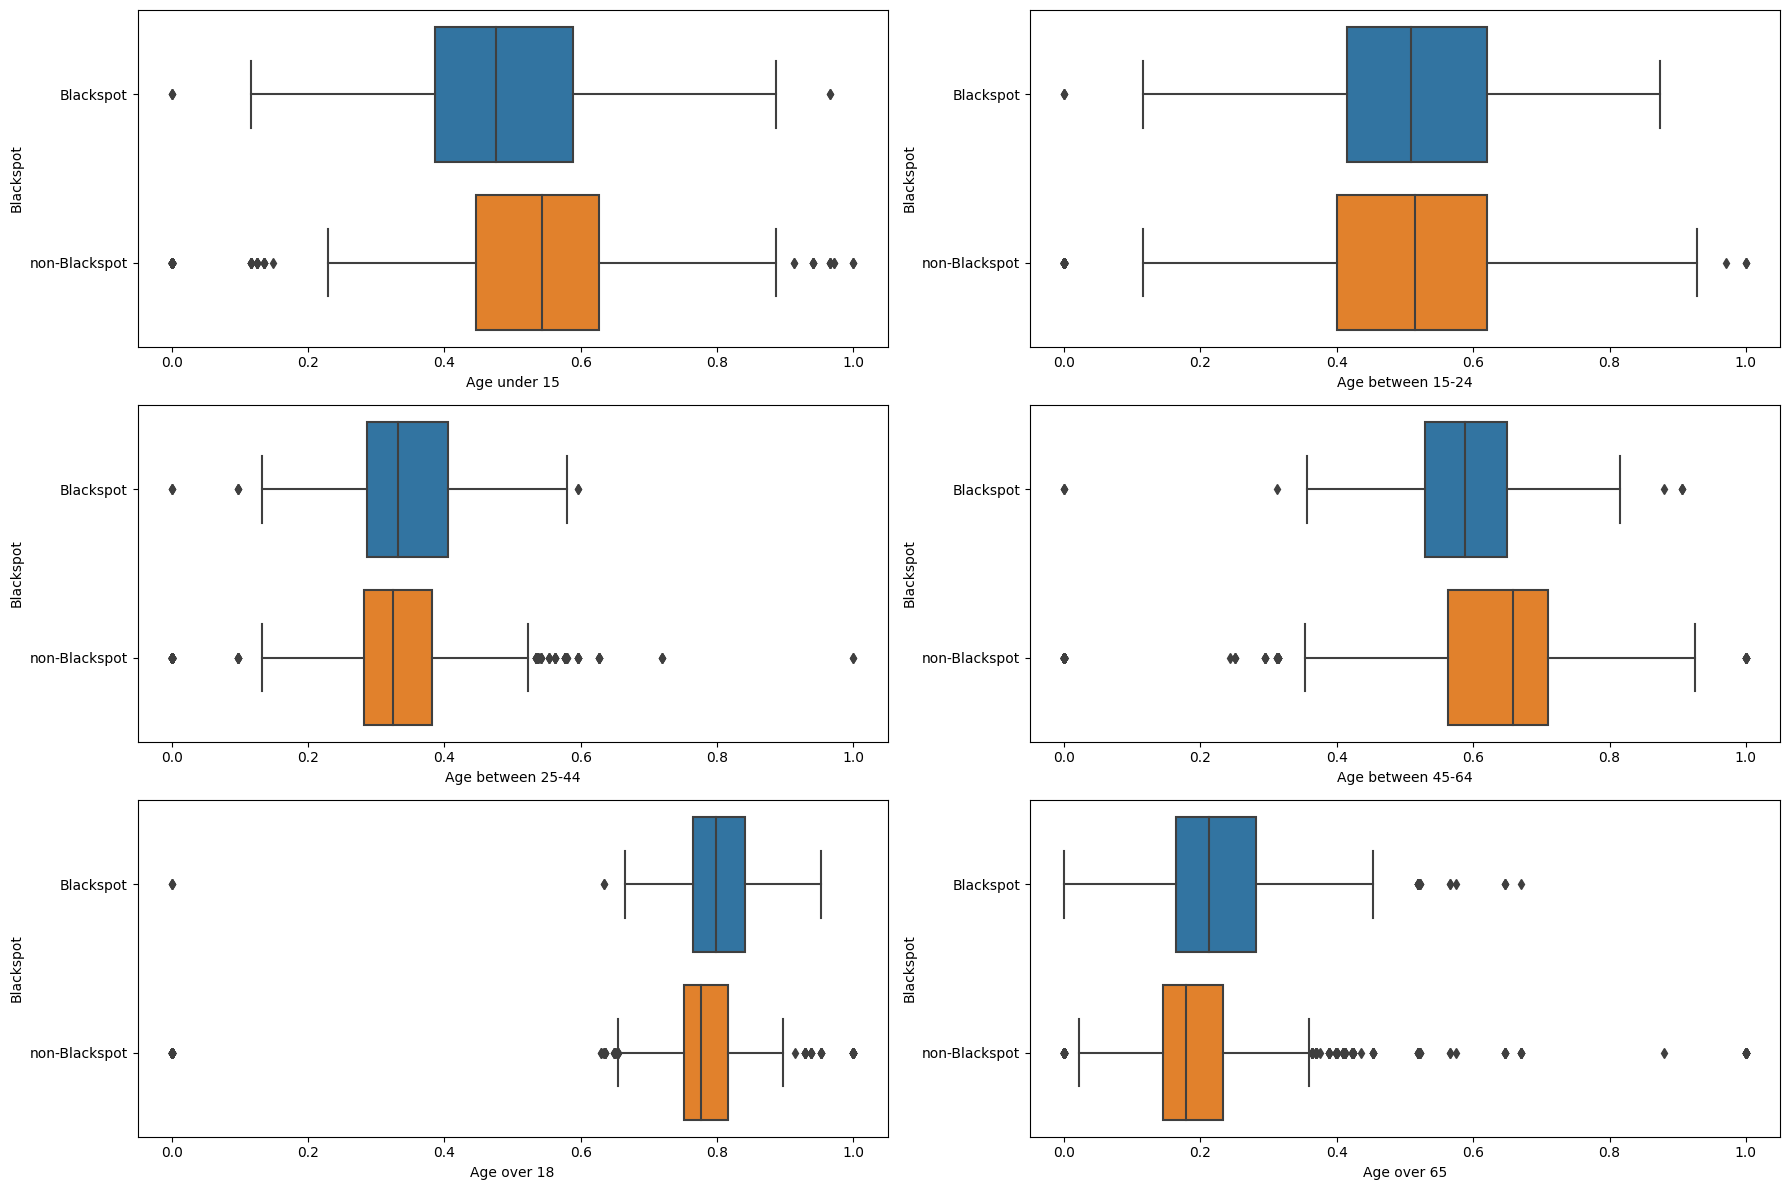

In [19]:
#Age Vs Blackspot

list_age = ["AGE_LESS_THAN_15YRS_PCNT","AGE_15_24YRS_PCNT","AGE_25_44YRS_PCNT","AGE_45_64YRS_PCNT","AGE_18YRS_OVER_PCNT","AGE_65YRS_OVER_PCNT"]
title = ["Age under 15","Age between 15-24","Age between 25-44","Age between 45-64","Age over 18","Age over 65"]

fig,ax = plt.subplots(nrows=3,ncols=2, figsize=(18,12))
axes = ax.flatten()
for i in range(len(list_age)):
  sns.boxplot(data=df, x=df[list_age[i]], y="Blackspot", ax = axes[i])
  axes[i].set_xlabel(title[i])

plt.tight_layout()
plt.show()

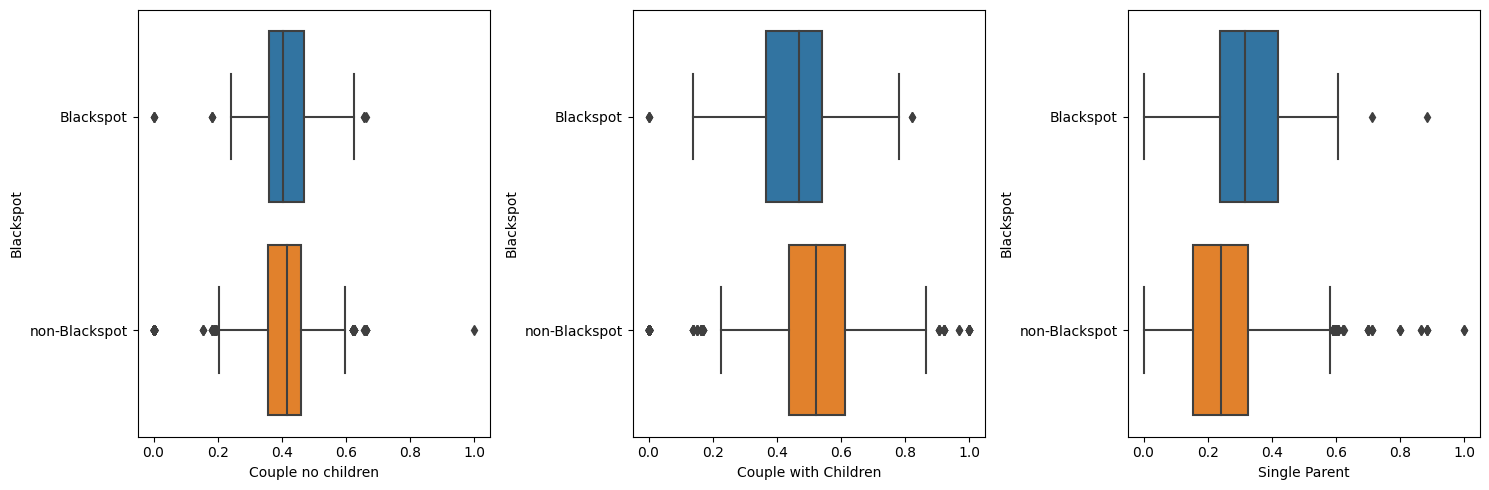

In [20]:
list_family = ["FC_COUPLE_NO_CHILDREN_PCNT","FC_COUPLE_WITH_CHILDREN_PCNT","FC_SINGLE_PARENT"]
title = ["Couple no children","Couple with Children","Single Parent"]

fig,ax = plt.subplots(nrows=1,ncols=3, figsize=(15,5))
axes = ax.flatten()
for i in range(len(list_family)):
  sns.boxplot(data=df, x=df[list_family[i]], y="Blackspot", ax = axes[i])
  axes[i].set_xlabel(title[i])

plt.tight_layout()
plt.show()

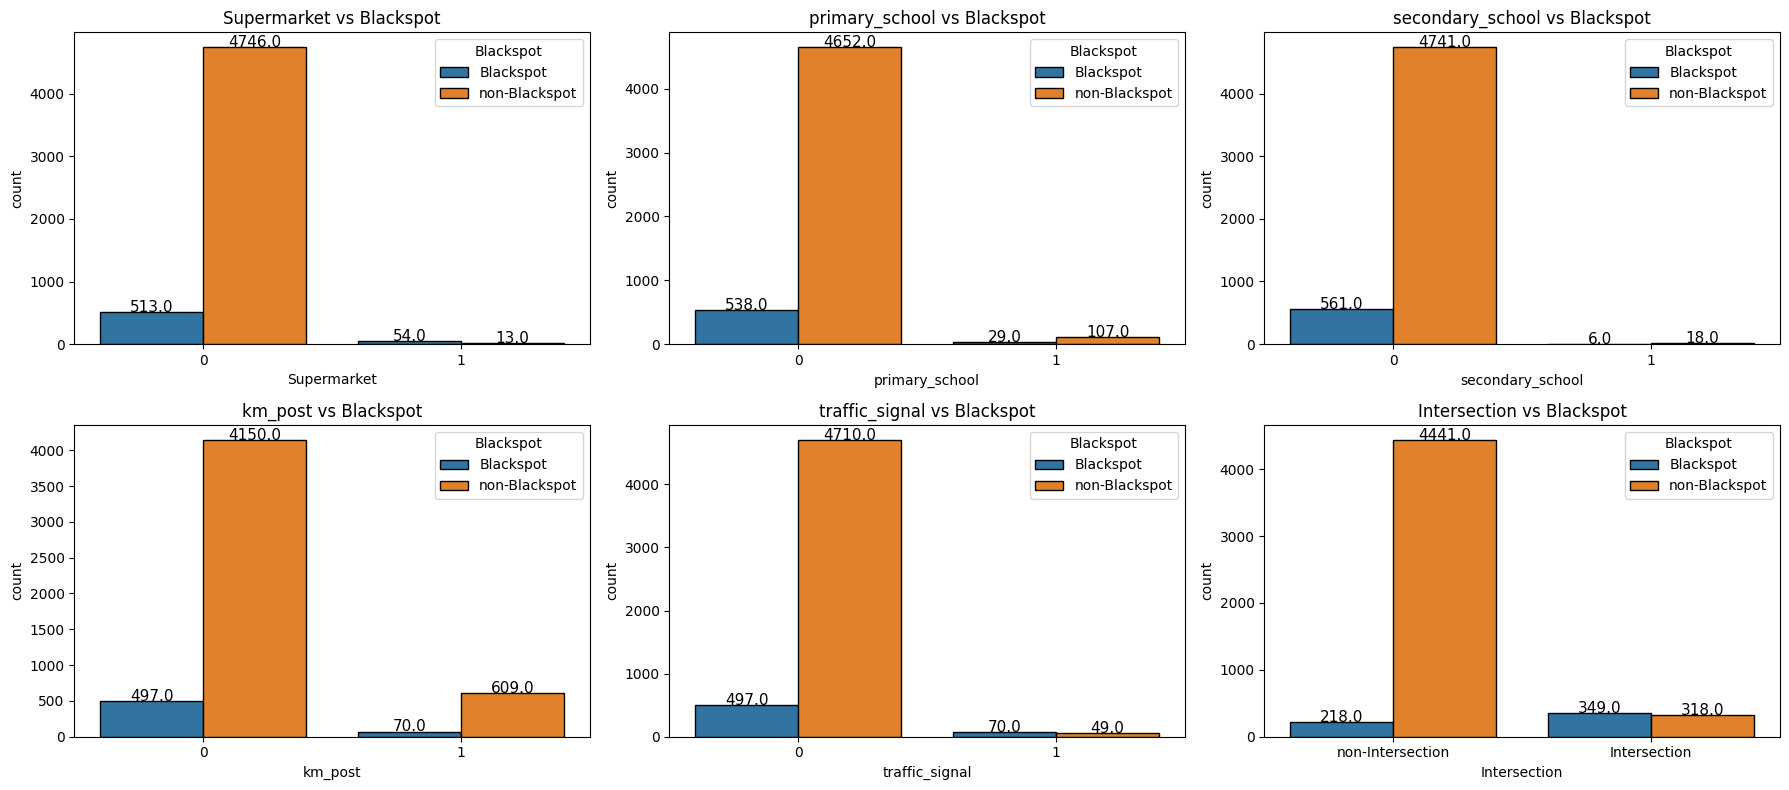

In [21]:
#Point of interest Vs Blackspot

l1 = ["Supermarket","primary_school","secondary_school","km_post","traffic_signal","Intersection"]   #Points of Interest within 150m of a road segment

fig = plt.subplots(nrows = 2,ncols = 3,figsize = (18,8))
for i in range(len(l1)):
    plt.subplot(2,3,i+1)
    ax = sns.countplot(x=l1[i],data = df,hue = "Blackspot",edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l1[i] + ' vs Blackspot'
    plt.title(title)

plt.tight_layout()
plt.show()

<Axes: xlabel='ROAD_TYPE', ylabel='count'>

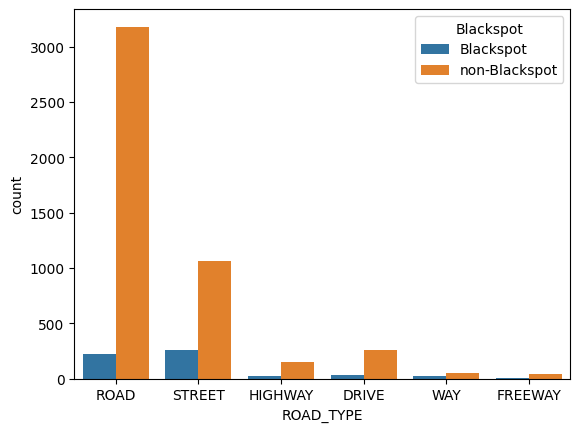

In [22]:
sns.countplot(data=df, x='ROAD_TYPE', hue='Blackspot')

In [23]:
count_table=pd.crosstab(df['ROAD_TYPE'],df['Blackspot'])
print(count_table)

Blackspot  Blackspot  non-Blackspot
ROAD_TYPE                          
DRIVE             31            264
FREEWAY           11             39
HIGHWAY           25            155
ROAD             219           3181
STREET           258           1066
WAY               23             54


### **Multivariate Analysis**

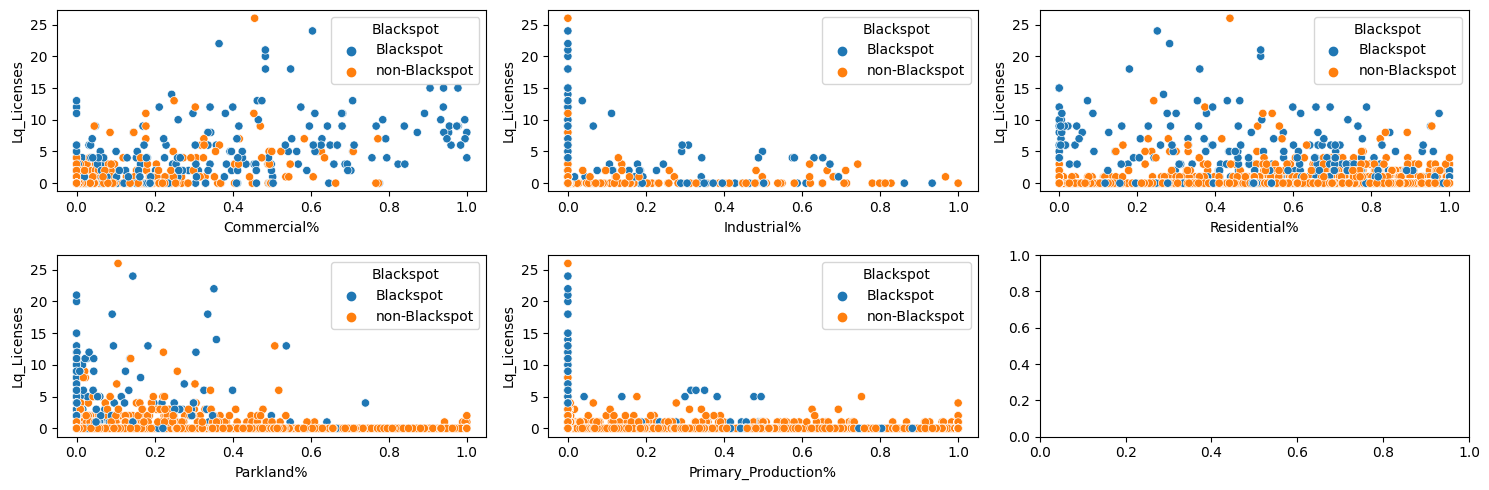

In [24]:
#Liquor License Vs Land Use

list_land = ["Commercial%","Industrial%","Residential%","Parkland%","Primary_Production%"]
title = ["Commercial","Industrial","Residential","Parkland","Primary_Production"]

fig,ax = plt.subplots(nrows=2,ncols=3, figsize=(15,5))
ax = ax.flatten()
for i in range(len(list_land)):
  sns.scatterplot(data=df, y='Lq_Licenses', x=df[list_land[i]], hue='Blackspot', ax=ax[i])

plt.tight_layout()
plt.show()

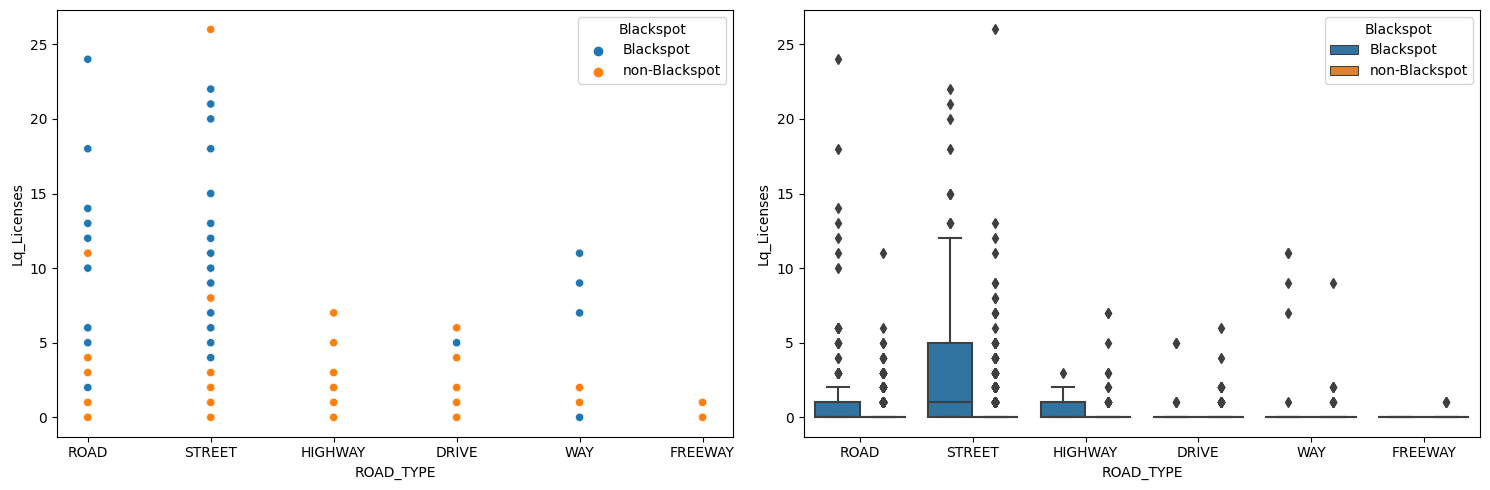

In [25]:
fig,ax = plt.subplots(nrows=1,ncols=2, figsize=(15,5))

sns.scatterplot(data=df, y='Lq_Licenses', x=df["ROAD_TYPE"], hue='Blackspot', ax=ax[0])
sns.boxplot(data=df, y='Lq_Licenses', x=df["ROAD_TYPE"], hue='Blackspot', ax=ax[1])

plt.tight_layout()
plt.show()

<Axes: xlabel='OCCUPATION_WHITE_COLLAR_PCNT', ylabel='SEIFA'>

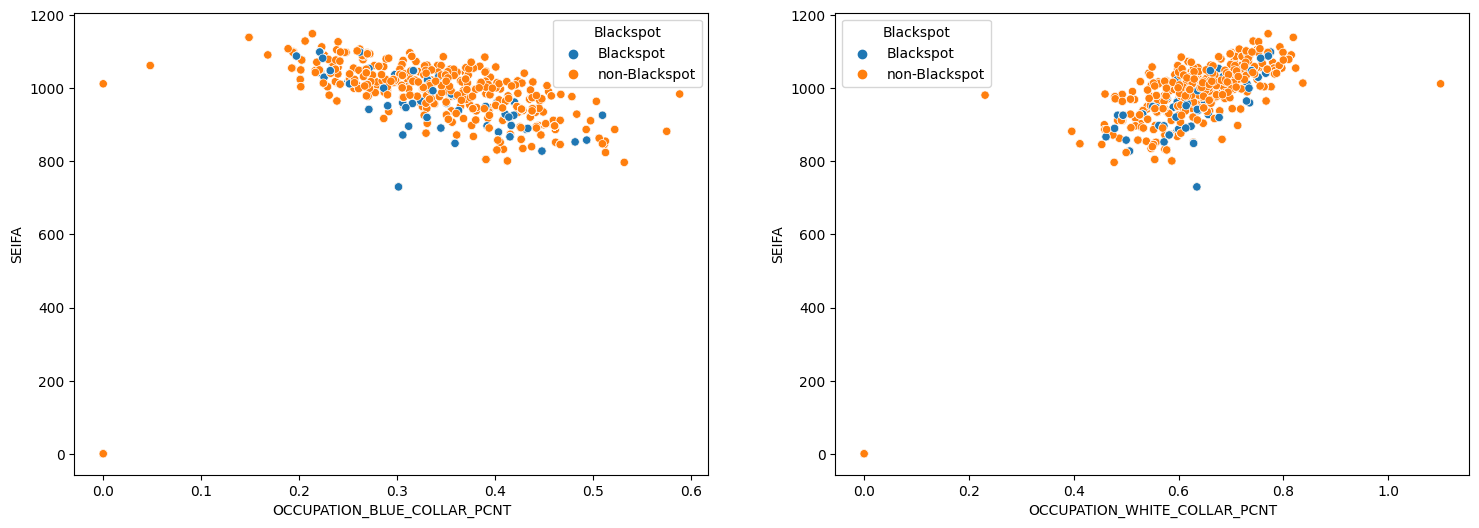

In [26]:
fig,ax = plt.subplots(1,2,figsize=(18,6))

sns.scatterplot(data=df, x="OCCUPATION_BLUE_COLLAR_PCNT",  y=df["SEIFA"], hue='Blackspot', ax = ax[0])
sns.scatterplot(data=df, x="OCCUPATION_WHITE_COLLAR_PCNT",  y=df["SEIFA"], hue='Blackspot', ax = ax[1])

## **Heatmap**

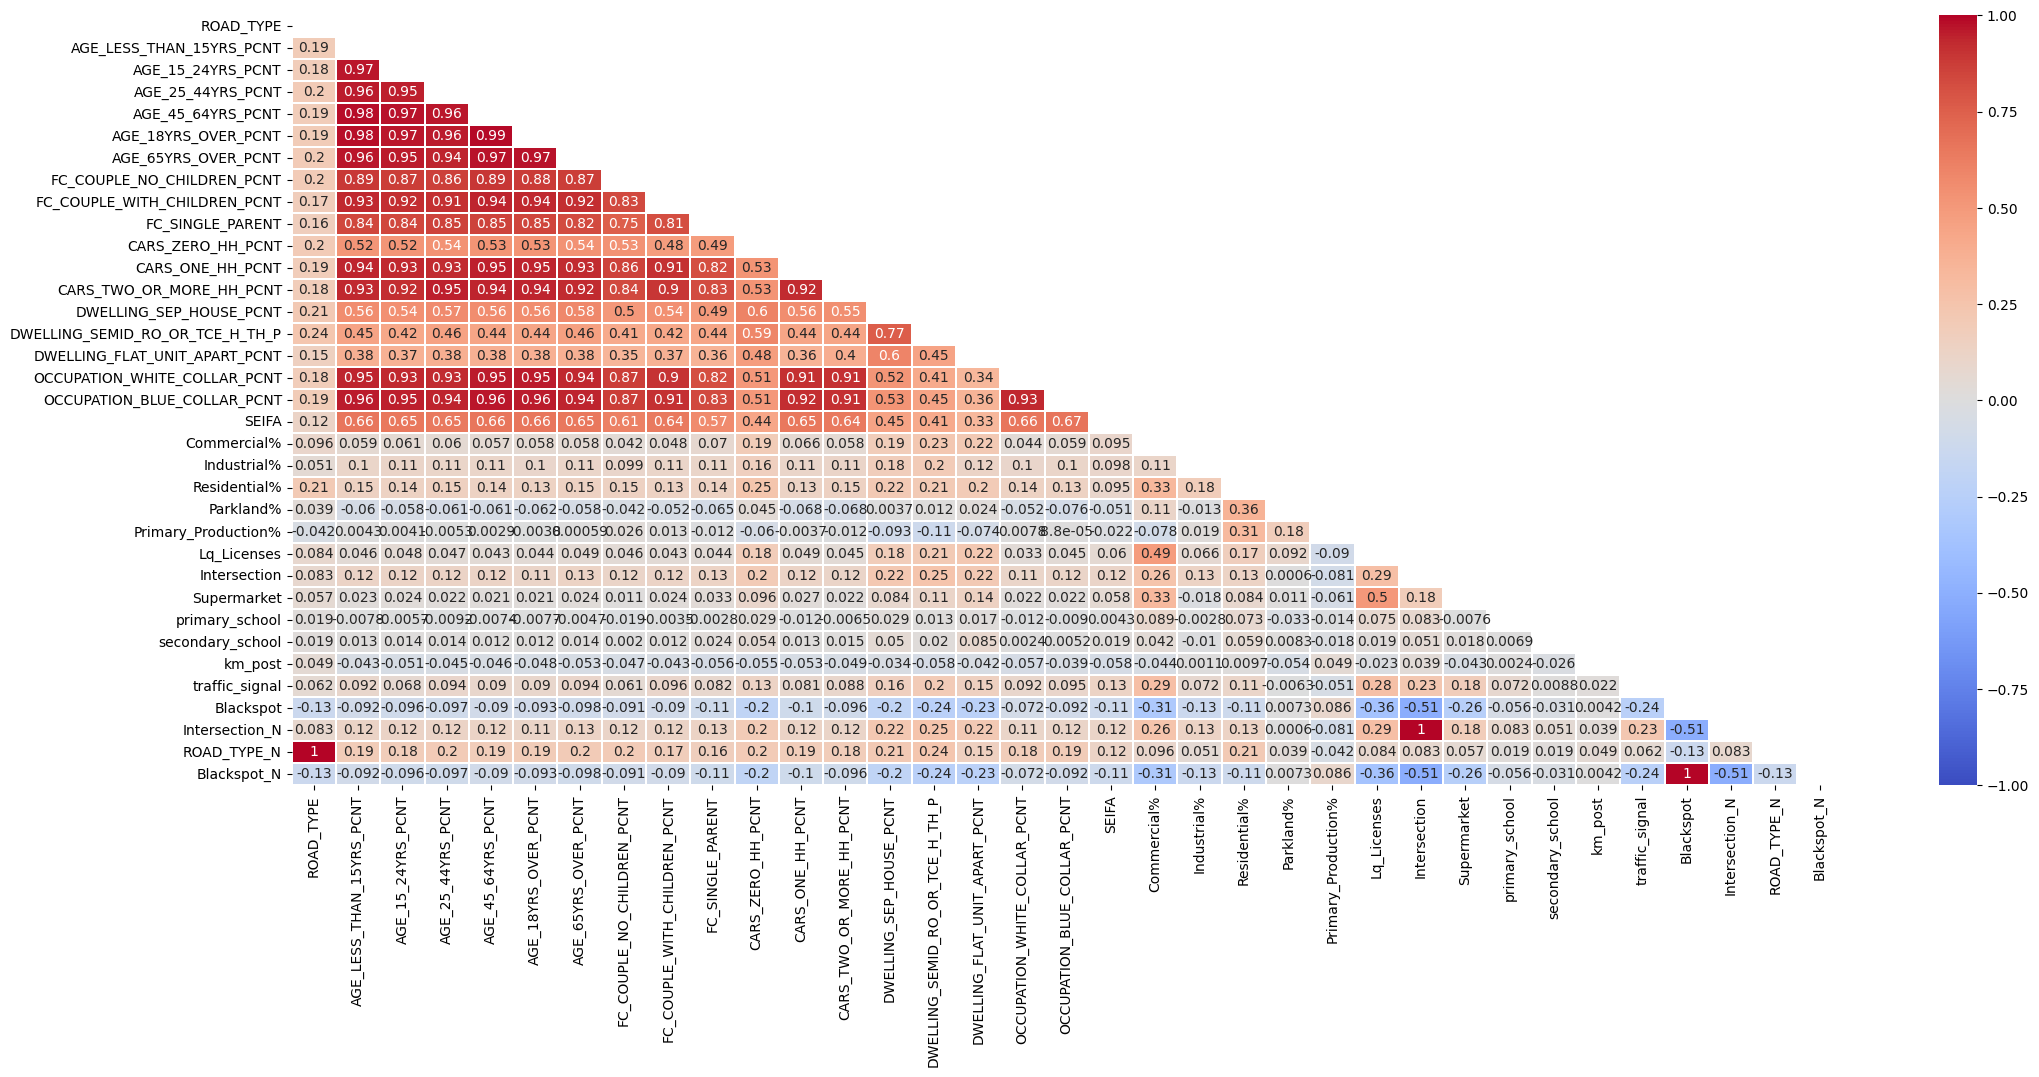

In [27]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

### **Clustermap**

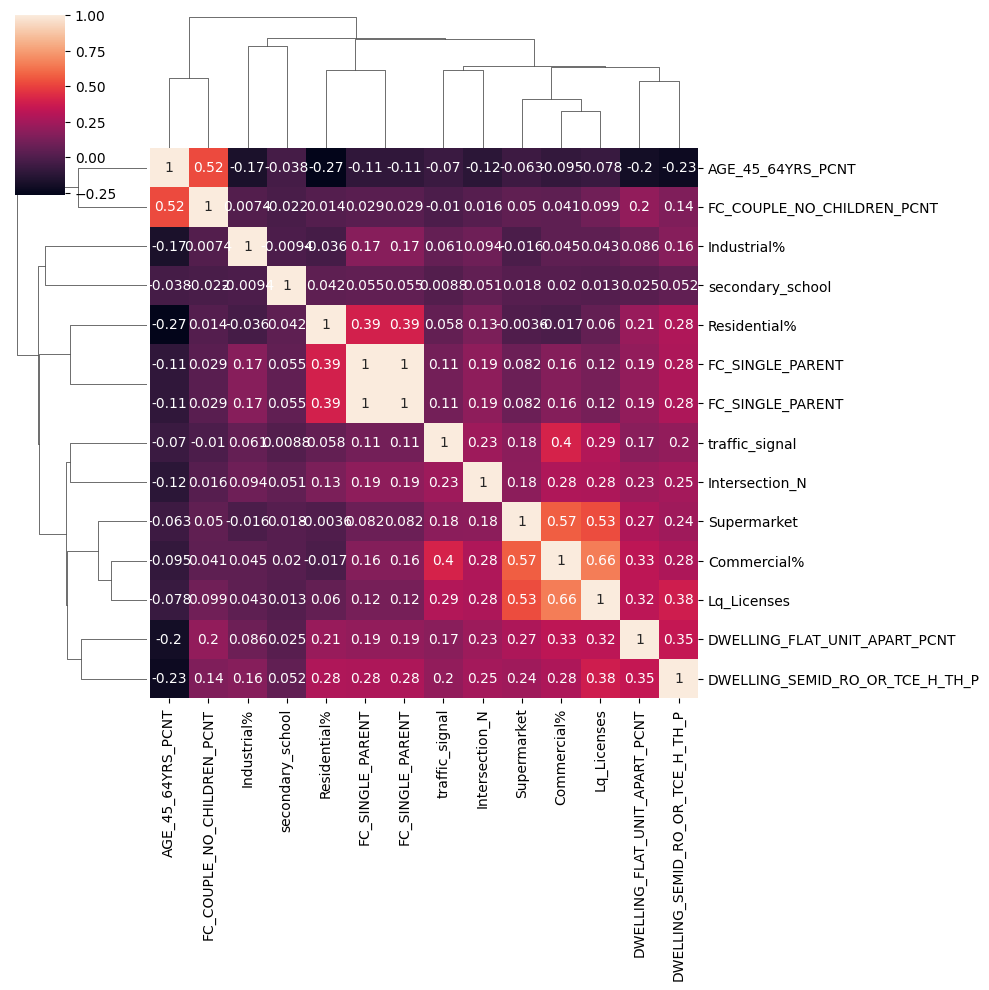

In [28]:
var = ["AGE_45_64YRS_PCNT","FC_SINGLE_PARENT","Industrial%","FC_SINGLE_PARENT","FC_COUPLE_NO_CHILDREN_PCNT","DWELLING_FLAT_UNIT_APART_PCNT","DWELLING_SEMID_RO_OR_TCE_H_TH_P","Commercial%","Residential%","Supermarket","secondary_school","traffic_signal","Lq_Licenses","Intersection_N"]
sns.clustermap(df[var].corr(), annot=True)

### **Regression Plot**

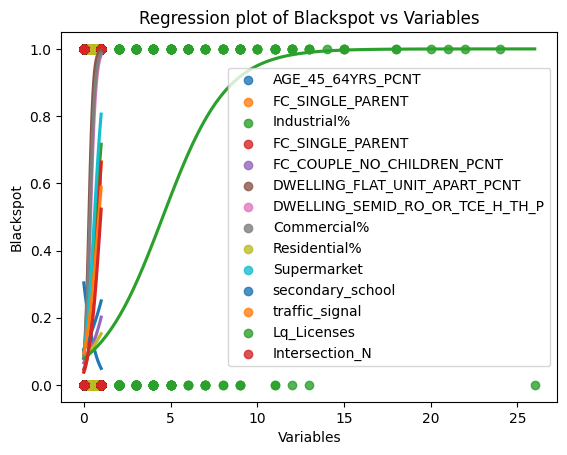

In [29]:
for i in var:
    sns.regplot(data=df,x=i, y=df['Blackspot_N'], logistic=True, ci=None, label=i)

plt.xlabel('Variables')  # Set x-axis label
plt.ylabel('Blackspot')  # Set y-axis label
plt.title('Regression plot of Blackspot vs Variables')  # Set title
plt.legend()  # Display legend
plt.show()  # Display the plot

<a id = "cell_modeling"></a>
## 3. Machine learning model development

**Aim:** To demonstrate your understanding in AI modeling.

### **Feature selection**

In [30]:
features = ["AGE_45_64YRS_PCNT","FC_SINGLE_PARENT","Industrial%","FC_SINGLE_PARENT","FC_COUPLE_NO_CHILDREN_PCNT","DWELLING_FLAT_UNIT_APART_PCNT","DWELLING_SEMID_RO_OR_TCE_H_TH_P","Commercial%","Residential%","Supermarket","secondary_school","traffic_signal","Lq_Licenses","Intersection_N"]
X = df[features]
y = df["Blackspot_N"]

### **Splitting data**

In [72]:
#Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1999)   #70:30

### **Model Implementation**

In [60]:
logreg= LogisticRegression(max_iter=100)

In [73]:
lr_model = logreg.fit(X_train,y_train)   #fitting the data for trainig purpose

In [74]:
y_pred = lr_model.predict(X_test)    #testing the model for its performance

### **Inspecting prediction**

In [63]:
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
inspection.head(10)

,Actual,Predicted
743,0,0
1207,0,0
5188,0,0
2350,0,0
2376,0,0
19,0,0
950,0,0
796,0,0
4859,0,0
2229,1,1


In [75]:
y_pred_probs = logreg.predict_proba(X_test)
y_pred_probs = y_pred_probs[:,1]

In [76]:
inspection_prob = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred, 'Probability':y_pred_probs})
inspection_prob.head(10)

,Actual,Predicted,Probability
743,0,0,0.034189
1207,0,0,0.031131
5188,0,0,0.030574
2350,0,0,0.040012
2376,0,0,0.038651
19,0,0,0.025580
950,0,0,0.036807
796,0,0,0.031672
4859,0,0,0.334601
2229,1,1,0.849226


<a id = "cell_Evaluation"></a>
## 4. Model evaluation                                                                                                                       

#### NOTE: You can create multiple Markdown and Code cells to present your work.
**Aim:** To demonstrate your understanding in model execution and evaluation.

_Use this section to report your evaluation procedures and results.  Discuss/interpret the results of your experiments, discuss/compare the performance of the model(s), any steps you have taken to improve the performance of your model(s)._


In [77]:
#call metrics functions: Accuracy, Precision, Recall, F1 using the parameters y_test and y_pred
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Precision: ", metrics.precision_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))
print("F1: ", metrics.f1_score(y_test,y_pred))

Accuracy:  0.9167709637046307
Precision:  0.8604651162790697
Recall:  0.37948717948717947
F1:  0.5266903914590747


**Interpreting the above**

In [78]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[1391   12]
 [ 121   74]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1403
           1       0.86      0.38      0.53       195

    accuracy                           0.92      1598
   macro avg       0.89      0.69      0.74      1598
weighted avg       0.91      0.92      0.90      1598



**Plot ROC (Receiver operating characteristic) curve and confusion matrix**

In [79]:
probabilities = logreg.predict_proba(X_test)

In [80]:
y_prob = probabilities[:, 1]

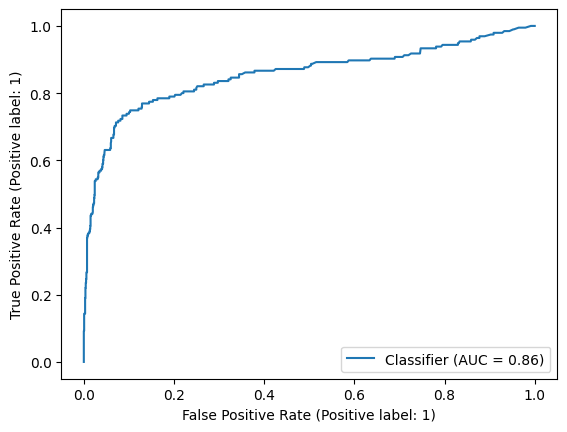

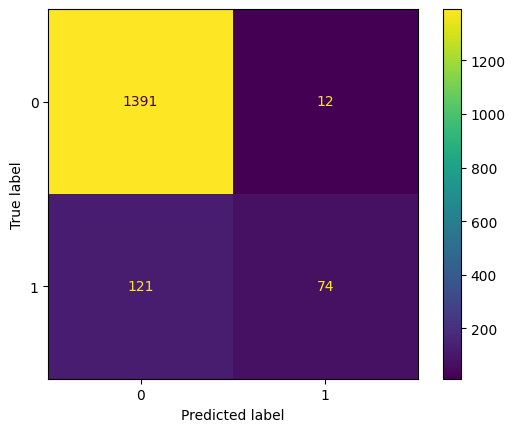

In [81]:
RocCurveDisplay.from_predictions(y_test, y_prob)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

Axes(0.125,0.11;0.775x0.77)


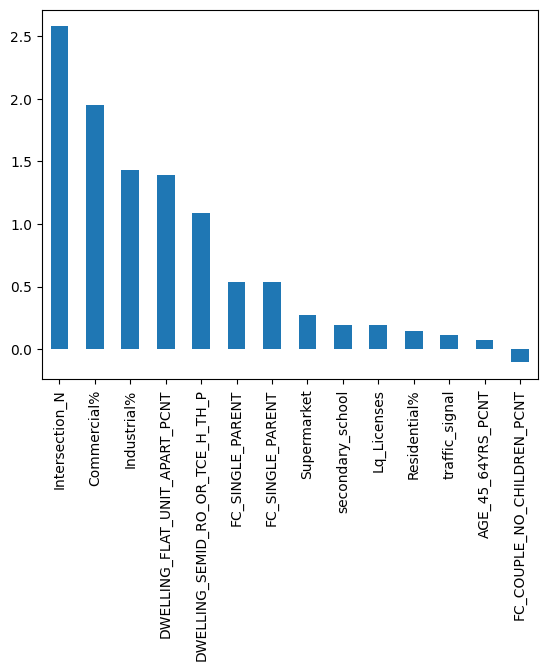

In [82]:
# To get the weights of all the variables
weights = pd.Series(logreg.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False).plot(kind='bar'))

## 5. Competition (optional)


**Aim:** To  participate in the competetion.


In [95]:
import pandas as pd

In [105]:
#read the Blackspot_Competition.csv dataset
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML Business files/Blackspot_Competition.csv")

In [106]:
df1 = df1.drop(["ID","EZI_ROAD_NAME","ROAD_NAME","SEO_PERSONS_PCNT"], axis=1)

In [107]:
df1.replace("", pd.NA, inplace=True)
df1['AGE_65YRS_OVER_PCNT'].fillna(df1['AGE_65YRS_OVER_PCNT'].median(), inplace=True)
df1['Lq_Licenses'].fillna(df1['Lq_Licenses'].mode()[0], inplace=True)

In [108]:
def Intersection(x):
  if x=="Intersection":return 1
  if x=="non-Intersection":return 0
df1['Intersection_N']= df1['Intersection'].apply(Intersection)


def road_type(x):
  if x=="ROAD":return 1
  if x=="STREET":return 2
  if x=="HIGHWAY":return 3
  if x=="DRIVE":return 4
  if x=="WAY":return 5
  if x=="FREEWAY":return 6

df1['ROAD_TYPE_N']= df1['ROAD_TYPE'].apply(road_type)

In [109]:
mms = MinMaxScaler()

df1.iloc[:,1:7] = mms.fit_transform(df1.iloc[:,1:7])
df1.iloc[:,7:10] = mms.fit_transform(df1.iloc[:,7:10])
df1.iloc[:,13:16] = mms.fit_transform(df1.iloc[:,13:16])
df1.iloc[:,19:24] = mms.fit_transform(df1.iloc[:,19:24])

In [113]:
features = ["AGE_45_64YRS_PCNT","FC_SINGLE_PARENT","Industrial%","FC_SINGLE_PARENT","FC_COUPLE_NO_CHILDREN_PCNT","DWELLING_FLAT_UNIT_APART_PCNT","DWELLING_SEMID_RO_OR_TCE_H_TH_P","Commercial%","Residential%","Supermarket","secondary_school","traffic_signal","Lq_Licenses","Intersection_N"]
X_deploy = df1[features]

In [114]:
logreg= LogisticRegression(max_iter=100)

In [115]:
y_deploy = lr_model.predict(X_deploy)    #testing the model for its performance

In [116]:
# Apply data transformation to the deployment data,
# ensure number of features and transformation of X and X_deploy are similar

# Apply trained model to X_deploy
# y_deploy = model(X_deploy)

#
# join unseen y_deploy with predicted value into a data frame
inspection = pd.DataFrame({'Predicted':y_deploy})

# join X_test with the new dataframe
inspection = pd.concat([X_deploy, inspection], axis=1)

# Submit this results.csv file to join the competition
inspection.to_csv('results.csv')